## The MLNN Architecture
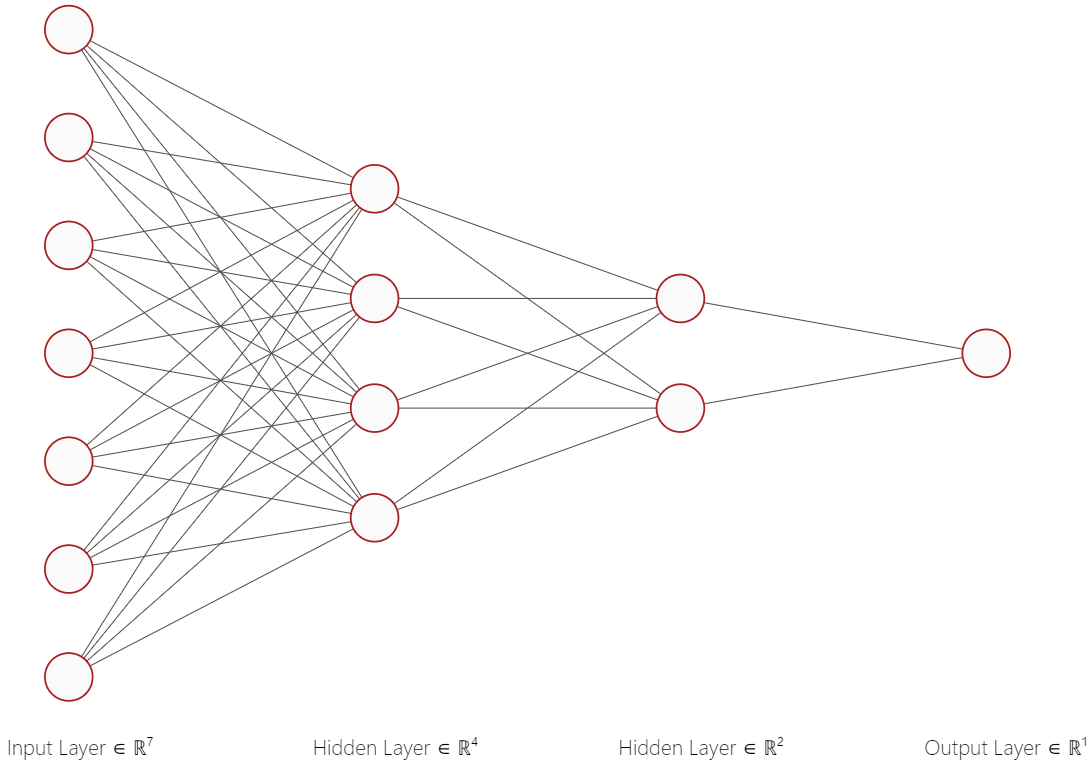

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()
from random import seed
from random import random
import math

## Loading the raw data

In [2]:
data = pd.read_csv('weatherHistory.csv')
#data = data.sample(frac = 1)
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Preprocessing

In [3]:
data = data.drop(['Loud Cover'],axis=1)
data = data.drop(['Daily Summary'],axis=1)
data = data.drop(['Summary'],axis=1)

In [4]:
data.isnull().sum()

Formatted Date                0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [5]:
data = data.drop(['Formatted Date'],axis=1)
data.fillna(method='ffill', inplace=True)

In [6]:
data['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [7]:
data.isnull().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [8]:
data.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [9]:
pressure_median = data['Pressure (millibars)'].median()
data['Pressure (millibars)'] = data['Pressure (millibars)'].replace({0:pressure_median})
data['Precip Type'] = data['Precip Type'].replace({'rain':0 , 'snow':1})

data.describe()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,0.111059,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1016.809278
std,0.314207,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,7.726359
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,973.780000
25%,0.000000,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1012.200000
50%,0.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,0.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,1.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [10]:
target = data['Humidity'].values.reshape(data.shape[0], 1)
data = data.drop(['Humidity'],axis=1)
data.fillna(method='ffill', inplace=True)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=2)

X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T


print(f"Shape of train set is {X_train.shape}")
print(f"Shape of test set is {X_test.shape}")
print(f"Shape of train label is {Y_train.shape}")
print(f"Shape of test labels is {Y_test.shape}")

Shape of train set is (7, 77162)
Shape of test set is (7, 19291)
Shape of train label is (1, 77162)
Shape of test labels is (1, 19291)


## Build Model

In [12]:
def relu(Z):
    A = np.maximum(0,Z)
    return A

def tanh(x):
    return np.tanh(x)

def derivative_relu(Z):
    return np.array(Z > 0, dtype = 'float')

def derivative_tanh(x):
    return (1 - np.power(x, 2))

In [13]:
def initialize_parameters(layer_dims):
    
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [14]:
def forward_propagation(X, parameters, activation):
   
    forward_cache = {}
    L = len(parameters) // 2                  
    
    forward_cache['A0'] = X

    for l in range(1, L):
        forward_cache['Z' + str(l)] = parameters['W' + str(l)].dot(forward_cache['A' + str(l-1)]) + parameters['b' + str(l)]
        
        if activation == 'tanh':
            forward_cache['A' + str(l)] = tanh(forward_cache['Z' + str(l)])
        else:
            forward_cache['A' + str(l)] = relu(forward_cache['Z' + str(l)])
            

    forward_cache['Z' + str(L)] = parameters['W' + str(L)].dot(forward_cache['A' + str(L-1)]) + parameters['b' + str(L)]
    
   
    forward_cache['A' + str(L)] = forward_cache['Z' + str(L)]
    
    return forward_cache['A' + str(L)], forward_cache

In [15]:
def compute_cost(a2, y):
    
    m = y.shape[1]
    cost = (1/m)* np.sum((a2 - y) *(a2 - y) )
    #cost = (-1/m) * np.sum(np.sum(y*np.log(a2,0),1))
    return cost

In [16]:
def backward_propagation(AL, Y, parameters, forward_cache, activation):
    
    grads = {}
    L = len(parameters)//2
    m = AL.shape[1]
    
    grads["dZ" + str(L)] = AL - Y
    grads["dW" + str(L)] = 1./m * np.dot(grads["dZ" + str(L)],forward_cache['A' + str(L-1)].T)
    grads["db" + str(L)] = 1./m * np.sum(grads["dZ" + str(L)], axis = 1, keepdims = True)
    
    for l in reversed(range(1, L)):
        if activation == 'tanh':
            grads["dZ" + str(l)] = np.dot(parameters['W' + str(l+1)].T,grads["dZ" + str(l+1)])*derivative_tanh(forward_cache['A' + str(l)])
        else:
            grads["dZ" + str(l)] = np.dot(parameters['W' + str(l+1)].T,grads["dZ" + str(l+1)])*derivative_relu(forward_cache['A' + str(l)])
            
        grads["dW" + str(l)] = 1./m * np.dot(grads["dZ" + str(l)],forward_cache['A' + str(l-1)].T)
        grads["db" + str(l)] = 1./m * np.sum(grads["dZ" + str(l)], axis = 1, keepdims = True)

    return grads

In [17]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2 
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

In [18]:
def model(X, Y, layers_dims, learning_rate = 0.03, activation = 'relu', num_iterations = 3000):#lr was 0.009

    np.random.seed(1)             
    cost_list = []
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        AL, forward_cache = forward_propagation(X, parameters, activation)

        cost = compute_cost(AL, Y)

        grads = backward_propagation(AL, Y, parameters, forward_cache, activation)

        parameters = update_parameters(parameters, grads, learning_rate)
        cost_list.append( cost )
        if i%(num_iterations/10) == 0  :
            print("cost after", i, "iters is" ,     cost   )

       
    return parameters,cost_list

In [19]:
layers_dims = [X_train.shape[0], 4,2 ,Y_train.shape[0]] #  3-layer model
lr = 0.005237
iters = 2500

parameters,Cost_list = model(X_train, Y_train, layers_dims, learning_rate = lr, activation = 'relu', num_iterations = iters)

cost after 0 iters is 0.5785199593063943
cost after 250 iters is 0.0772579634190345
cost after 500 iters is 0.04096048277434216
cost after 750 iters is 0.03833210258202478
cost after 1000 iters is 0.038141775806924585
cost after 1250 iters is 0.03812799382765615
cost after 1500 iters is 0.03812699584430644
cost after 1750 iters is 0.038126923578143006
cost after 2000 iters is 0.03812691834519159
cost after 2250 iters is 0.03812691796626211


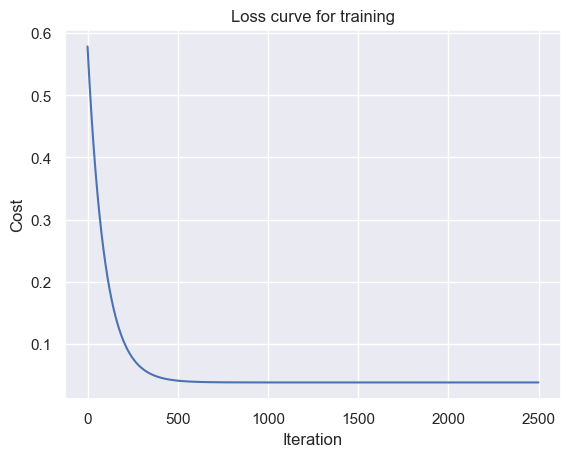

In [20]:
t = np.arange(0, iters)
plt.plot(t, Cost_list)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Loss curve for training")
plt.show()

In [21]:
def predict(X, parameters, activation):
   
    forward_cache = {}
    L = len(parameters) // 2                  
    
    forward_cache['A0'] = X
    for l in range(1, L):
        forward_cache['Z' + str(l)] = parameters['W' + str(l)].dot(forward_cache['A' + str(l-1)]) + parameters['b' + str(l)]
        
        if activation == 'tanh':
            forward_cache['A' + str(l)] = tanh(forward_cache['Z' + str(l)])
        else:
            forward_cache['A' + str(l)] = relu(forward_cache['Z' + str(l)])
            

    forward_cache['Z' + str(L)] = parameters['W' + str(L)].dot(forward_cache['A' + str(L-1)]) + parameters['b' + str(L)]

   
    forward_cache['A' + str(L)] = forward_cache['Z' + str(L)]
    
    return  forward_cache['Z' + str(L)]

y_test_predicted = predict(X_test, parameters, activation = 'relu')

## Mean Square Error For Testing set

In [22]:
def MSE(y_pred,y):
    n = y.shape[1]
    ans = np.sum((y_pred - y) ** 2)
    ans/=n
    return ans
print("MSE:",MSE(y_test_predicted,Y_test))

MSE: 0.038538526278417466
